In [1]:
import tweepy as tw
import pandas as pd
import re
import json
import GetOldTweets3 as got
import time


In [2]:
#Read my verification
with open('twitter-tokens.txt', 'r') as tfile:
    consumer_key = tfile.readline().strip('\n')
    consumer_secret = tfile.readline().strip('\n')
    acess_token = tfile.readline().strip('\n')
    acess_token_secret = tfile.readline().strip('\n')

In [3]:
#check my verification
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(acess_token, acess_token_secret)

api = tw.API(auth)

In [4]:
#name of user
screen_name = 'DeusAcimDtodos'

In [5]:
# code refactoring 
import pickle
with open('vectorizer_model.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
    
import pickle
with open('forest_model.pkl', 'rb') as f:
    forest = pickle.load(f)

############################################################################################################################

def run_model_on_df(df, forest):
    
    return forest.predict(df)
    
############################################################################################################################



list_user_friends = []
def get_friends(x):
    
    for friends in tw.Cursor(api.friends, screen_name).items(10):
        list_user_friends.append(friends.screen_name)
        time.sleep(1)
        
# this gives us the list of top 9 friends
get_friends(screen_name)
list_user_friends.append(screen_name)

#Get the tweets in getoldtweets
tweetCriteria = got.manager.TweetCriteria().setUsername(list_user_friends)\
                                           .setMaxTweets(100*len(list_user_friends))
tweets = list(got.manager.TweetManager.getTweets(tweetCriteria))

tweets_old = []
for i in tweets:
    tweets_old.append(i)

tweets_list2 = [(tweet.id, tweet.username,tweet.date,tweet.retweets, tweet.text ) for tweet in tweets_old]

tweets_list2 = pd.DataFrame(tweets_list2,columns=['Tweet Id','username','Datetime','Retweets', 'Text'])

#cleaning and count frequency of tweets per day
tweets_list2['Date']= tweets_list2['Datetime'].dt.strftime('%Y-%m-%d')
tweets_list2.drop(['Datetime'], axis=1 , inplace= True)
frequency = pd.DataFrame(tweets_list2.groupby(['username','Date'])['Tweet Id'].count())
tweets_list2 = pd.merge(tweets_list2, frequency, on=['username', 'Date'])

users_prediction = {}

for user, df in tweets_list2.groupby('username'):
    print(user)
    df.drop([ 'Tweet Id_x','username','Date'], axis=1 , inplace= True) 

    first = pd.DataFrame.sparse.from_spmatrix(vectorizer.transform(df['Text'])).reset_index(drop = True)
    df = df.reset_index(drop = True)
    result = first.merge(df, left_index=True, right_index=True)
    result = result.drop(['Text'], axis = 1)

    predictions = run_model_on_df(result[:100], forest)

    
    if list(predictions).count("Sim") >= 1:
        users_prediction[user] = "BOT"
    else:
        users_prediction[user] = "NOT BOT"


AtalaiaBR


C:\Users\Diogo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


BrazilFight


C:\Users\Diogo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


DaniWineBrasil


C:\Users\Diogo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


DeusAcimDtodos


C:\Users\Diogo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


HalpherLuiggi


C:\Users\Diogo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


bolsonaro22_38


C:\Users\Diogo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


depatriota12


C:\Users\Diogo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


pittaopacheco


C:\Users\Diogo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


rduartedelima


C:\Users\Diogo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [6]:
main_list = []
for user in users_prediction.keys():
    main_list.append([screen_name, user, users_prediction[user]])

In [7]:
final = pd.DataFrame(main_list, columns = ['screen_name','friends','botornot'])
final

,screen_name,friends,botornot
0,DeusAcimDtodos,AtalaiaBR,BOT
1,DeusAcimDtodos,BrazilFight,NOT BOT
2,DeusAcimDtodos,DaniWineBrasil,BOT
3,DeusAcimDtodos,DeusAcimDtodos,BOT
4,DeusAcimDtodos,HalpherLuiggi,NOT BOT
5,DeusAcimDtodos,bolsonaro22_38,BOT
6,DeusAcimDtodos,depatriota12,NOT BOT
7,DeusAcimDtodos,pittaopacheco,NOT BOT
8,DeusAcimDtodos,rduartedelima,BOT


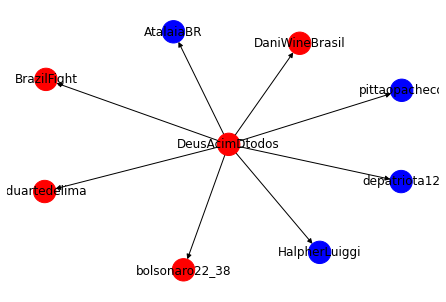

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()


G.add_node(screen_name, is_friend = True)

node_colour = []
for friend in final['friends']:
    G.add_node(friend, is_friend = True)
    G.add_edge(screen_name, friend)


for i in final['botornot']:
    if i == 'BOT':
        node_colour.append('r')
    else:
        node_colour.append('b')
    
nx.draw(G, with_labels=True,node_size= 500, node_color = node_colour)
plt.show()